## Dataset (5dsdm) overview

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
DATASET_ID = "5dsdm"

In [3]:
from collections import defaultdict
from multiprocessing import cpu_count

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 7
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.grid'] = True

In [4]:
import sys
sys.path.append('../../')

from tsdr import tsdr
from eval import groundtruth
from meltria import loader

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [8]:
metrics_files = !find "/datasets/argowf-chaos-{DATASET_ID}/argowf-chaos-pzl8m/" -type f -name "*.json"
dataset_generator = loader.load_dataset_as_generator(metrics_files, target_metric_types={
        "containers": True,
        "services": True,
        "nodes": True,
        "middlewares": True,
    },
    num_datapoints=180,
)
records = [r for rec in dataset_generator for r in rec]

In [9]:
import sys
sys.path.append("../")
from notebooklib.save import run_tsdr, save_tsdr, load_tsdr

In [10]:
list_of_record_and_reduced_df = run_tsdr(records)

In [11]:
for a, b, c, d in list_of_record_and_reduced_df:
    save_tsdr(DATASET_ID, a, b, c, d)

In [12]:
datasets_after_tsdr = load_tsdr(DATASET_ID)

1: ts-food-service/pod-memory-hog/0
2: ts-travel2-service/pod-memory-hog/0
3: ts-consign-mongo/pod-cpu-hog/0
4: ts-travel2-mongo/pod-network-loss/0
5: ts-user-mongo/pod-network-loss/0
6: ts-travel2-service/pod-cpu-hog/0
7: ts-station-mongo/pod-memory-hog/0
8: ts-payment-service/pod-cpu-hog/0
9: ts-train-mongo/pod-network-loss/0
10: ts-price-mongo/pod-memory-hog/0
11: ts-cancel-service/pod-memory-hog/0
12: ts-preserve-service/pod-cpu-hog/0
13: ts-payment-service/pod-network-loss/0
14: ts-station-service/pod-cpu-hog/0
15: ts-travel-mongo/pod-memory-hog/0
16: ts-auth-mongo/pod-memory-hog/0
17: ts-user-service/pod-network-loss/0
18: ts-food-service/pod-network-loss/0
19: ts-travel-service/pod-memory-hog/0
20: ts-payment-mongo/pod-network-loss/0
21: ts-travel2-mongo/pod-cpu-hog/0
22: ts-order-other-service/pod-network-loss/0
23: ts-food-mongo/pod-cpu-hog/0
24: ts-train-service/pod-network-loss/0
25: ts-price-service/pod-network-loss/0
26: ts-order-service/pod-cpu-hog/0
27: ts-auth-mongo/pod

<Figure size 2000x5000 with 0 Axes>

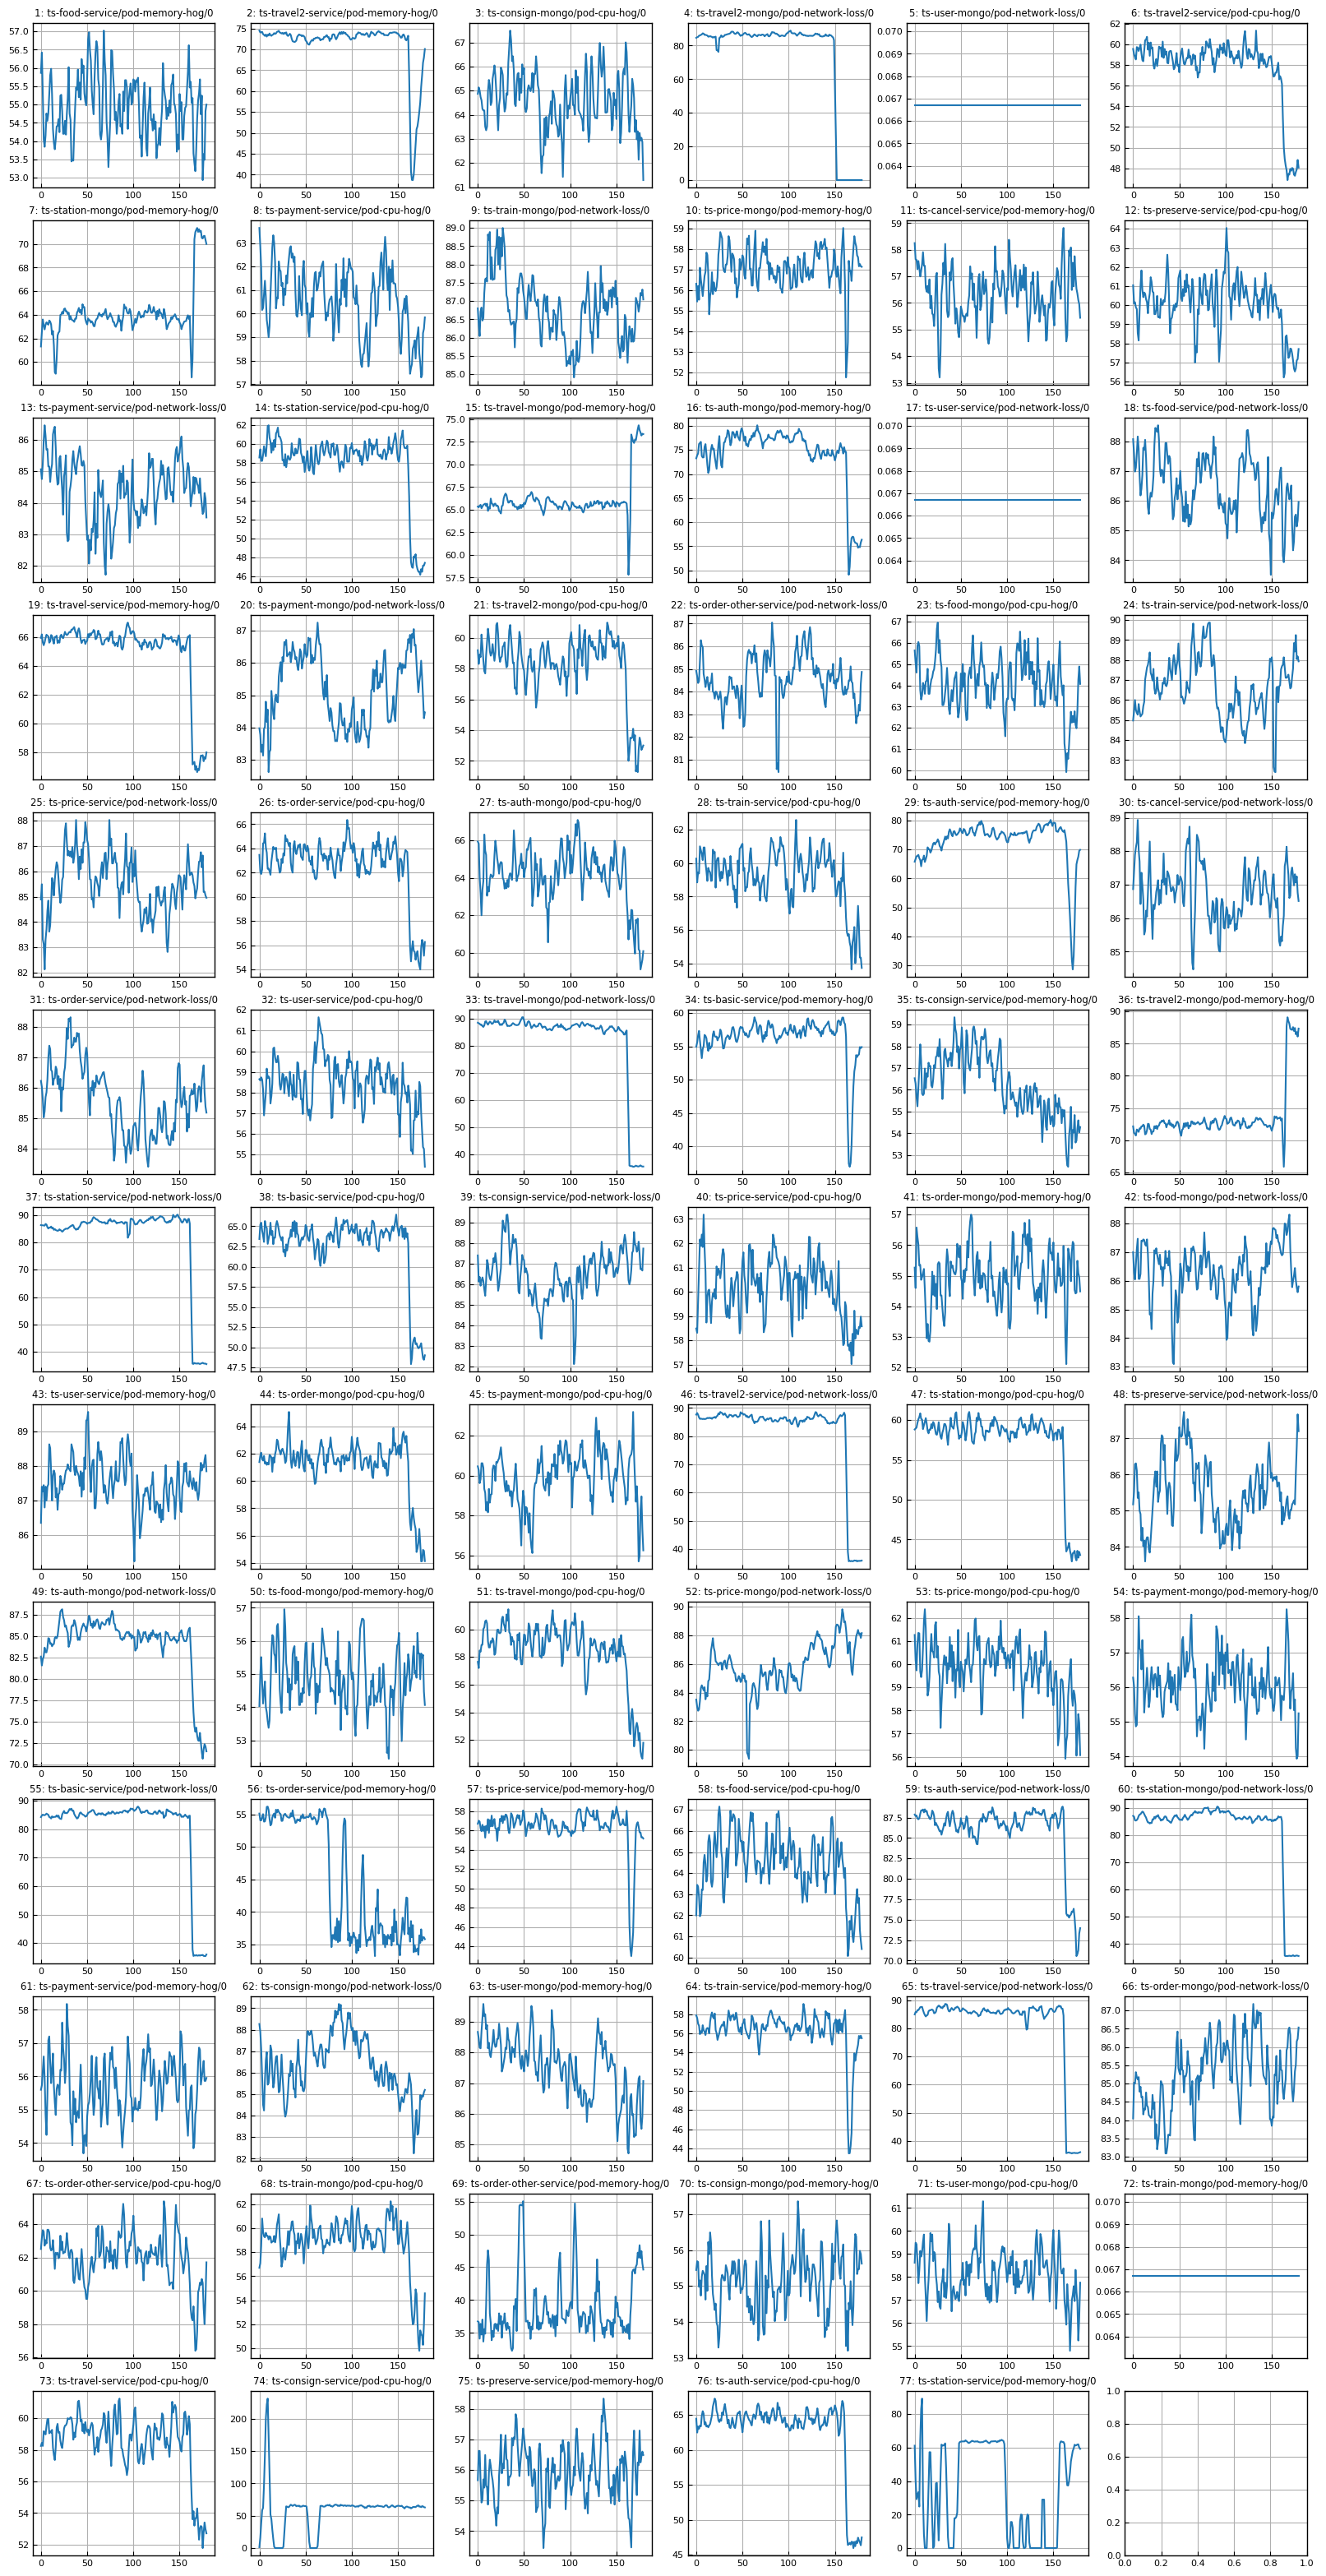

In [13]:
import math

slis_fig = plt.figure(figsize=(20, 50))
slis_fig, slis_axs = plt.subplots(math.ceil(len(datasets_after_tsdr)/6), 6, figsize=(20, 40))
for i, (slis_ax, (record, _, _, _)) in enumerate(zip(slis_axs.flatten(), datasets_after_tsdr)):
    sli_name = record.pk.get_root_metrics()[1]
    slis_ax.plot(record.data_df[sli_name].to_numpy())
    title = f"{i+1}: {record.chaos_case_full()}"
    slis_ax.set_title(title)
    print(title)

In [14]:
from tsdr.outlierdetection.n_sigma_rule import detect_with_n_sigma_rule

results = []
for record, _, _, _ in datasets_after_tsdr:
    sli_name = record.pk.get_root_metrics()[0]
    ok: bool = detect_with_n_sigma_rule(
        x=record.data_df[sli_name].to_numpy(),
        test_start_time=record.data_df.shape[0] - 20,
    ).size > 0
    results.append((record.chaos_case_full(), ok))
df = pd.DataFrame(results, columns=["chaos_case", "ok"]).query("ok == False")
df.index += 1
df

,chaos_case,ok
4,ts-travel2-mongo/pod-network-loss/0,False
5,ts-user-mongo/pod-network-loss/0,False
7,ts-station-mongo/pod-memory-hog/0,False
11,ts-cancel-service/pod-memory-hog/0,False
13,ts-payment-service/pod-network-loss/0,False
17,ts-user-service/pod-network-loss/0,False
18,ts-food-service/pod-network-loss/0,False
24,ts-train-service/pod-network-loss/0,False
30,ts-cancel-service/pod-network-loss/0,False
33,ts-travel-mongo/pod-network-loss/0,False
